# This notebooks shows how to process the raw daily feed

## Install dependencies

In [6]:
!pip install --upgrade epss
!pip install matplotlib

Looking in indexes: https://test.pypi.org/simple/


In [12]:
!pip install seaborn

Show version, date and some basic stats

In [13]:
from epss import epss
import logging

logging.basicConfig(level=logging.INFO)

client = epss.EPSS()
epss_df,status = client.get_all()

logging.info(f'Date = {status.score_date} Version = {status.version}')
logging.info(f'Total entries {len(epss_df)}')
logging.info(f"Total CVE {epss_df.index.nunique()}")
assert len(epss_df) == epss_df.index.nunique()


INFO:root:Date = 2022-05-12T000000+0000 Version = v2022.01.01
INFO:root:Total entries 175924
INFO:root:Total CVE 175924


## Plot simple charts

In [14]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

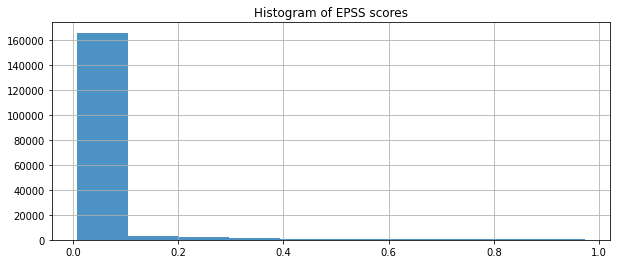

In [15]:
epss_df.hist(column='epss', alpha=0.8,figsize=(10,4))
plt.title('Histogram of EPSS scores')
plt.show()

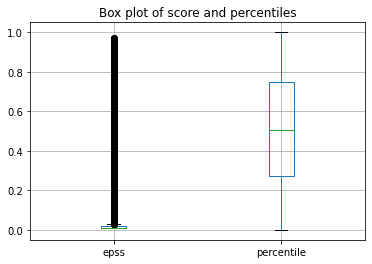

In [16]:
boxplot = epss_df.boxplot(column=['epss', 'percentile'])  
plt.title('Box plot of score and percentiles')
plt.show()

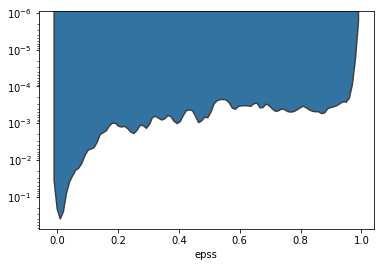

In [19]:
import seaborn as sb

sb.violinplot(x = 'epss',data = epss_df)

# display violin plot in log scale
plt.yscale('log')
plt.show()

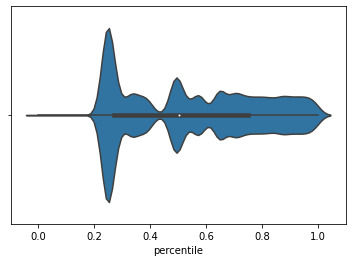

In [20]:
sb.violinplot(x = 'percentile',data = epss_df)

plt.show()

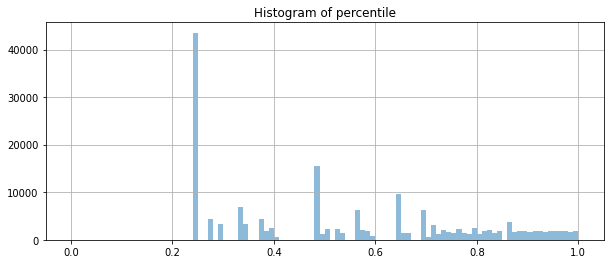

In [21]:
epss_df.hist(column='percentile',bins=100, alpha=0.5,figsize=(10,4))
plt.title('Histogram of percentile')
plt.show()

## Top CVSS

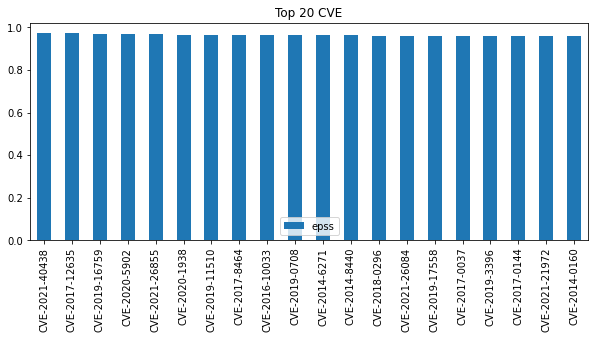

In [22]:
TOP = 20
epss_df.sort_values(by='epss',ascending=False).head(TOP).plot.bar(y='epss',figsize=(10,4))
plt.title(f'Top {TOP} CVE')
plt.show()

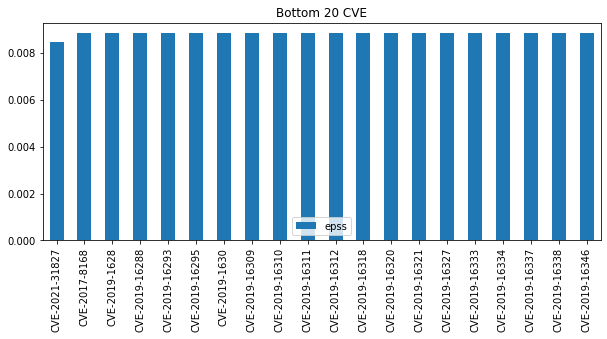

In [23]:
epss_df.sort_values(by='epss',ascending=True).head(TOP).plot.bar(y='epss',figsize=(10,4))
plt.title(f'Bottom {TOP} CVE')
plt.show()

# All done!